<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

# Descubrimiento
Los tipos de datos son adecuados, pero algunos valores como los de messages_included y mb_per_month_included parecen demasiado altos y podrían necesitar revisión para asegurar que reflejan los límites reales de los planes. Los precios unitarios (usd_per_message, usd_per_gb, usd_per_minute) son bajos, lo que podría indicar que están subestimados. Se sugiere ajustar los valores de los datos y revisar los precios para hacerlos más realistas.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans['mb_per_month_included'] = (plans['mb_per_month_included']/1024).astype('int')

Cambiamos el nombre de la columna mb_per_month_included a gb_per_month_included utilizando la función rename y comprobamos que los valores hayan sido correctamente transformados, imprimiendo la tabla plans.

In [6]:
plans = plans.rename(columns={'mb_per_month_included':'gb_per_month_included'})
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Para poder establecer qué plan de tarifa genera más ingresos a la empresa, vamos a necesitar generar el número y duración de llamadas mensuales, el número de mensajes mensuales y el volumen de datos mensual de cada usuario registrado.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

# Descubrimiento
Como podemos observar la tabla users esta formada por 500 filas y 8 columnas. La variable reg_date y churn_date son de tipo objeto, así que lo que debemos de hacer es transformar estos valores a tipo datatime, también podemos observar valores ausentes en la columna churn_date

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [10]:
users['reg_date']

0     2018-12-24
1     2018-08-13
2     2018-10-21
3     2018-01-28
4     2018-05-23
         ...    
495   2018-09-04
496   2018-02-20
497   2018-12-10
498   2018-02-04
499   2018-05-06
Name: reg_date, Length: 500, dtype: datetime64[ns]

In [11]:
users['churn_date']

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
495   NaT
496   NaT
497   NaT
498   NaT
499   NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]

Antes de reemplazar los valores ausentes de la columna churn_date vamos a generar una nueva columna que contenga las categorías active para aquellos clientes que todavía tienen un plan e inactive para aquellos que cancelaron el plan. Para esto crearemos una función churn_categories que clasificará los valores NaT como clientes activos y las fechas en las que termina de usar el servicio como clientes inactivos.

In [12]:
def churn_categories(churn_date):
    if pd.isna(churn_date):
        return 'active'
    return 'inactive'

Comprobamos que la función esté trabajando correctamente.

In [13]:
churn_categories(users.loc[0, 'churn_date'])

'active'

Aplicamos la función a una nueva columna churn_categories que contendrá las categorías active e inactive de acuerdo a los valores de churn_date.

In [14]:
users['churn_categories'] = users['churn_date'].apply(churn_categories)

In [15]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_categories
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,active
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,active
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,inactive
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,active
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,active
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,active


Por ultimo vamos a comprobar que periodo de tiempo abarcan nuestros datos, para esto, vamos a obtener valores minimos y máximos de ambas columnas

In [16]:
print(users['reg_date'].min())
print(users['reg_date'].max())

print(users['churn_date'].min())
print(users['churn_date'].max())

2018-01-01 00:00:00
2018-12-31 00:00:00
2018-07-31 00:00:00
2018-12-31 00:00:00


Ya que nuestros datos solo nos muestran personas registradas en el año 2018, vamos a reemplazar los valor NaT en la columna de churn_date con una fecha fuera del rango.

In [17]:
users['churn_date'] = users['churn_date'].fillna(value=pd.to_datetime('2019-01-01'))

In [18]:
users['churn_date'].isna().sum()

0

In [19]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_categories
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,active
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2019-01-01,active
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,inactive
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2019-01-01,active
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2019-01-01,active
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2019-01-01,active


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           500 non-null    int64         
 1   first_name        500 non-null    object        
 2   last_name         500 non-null    object        
 3   age               500 non-null    int64         
 4   city              500 non-null    object        
 5   reg_date          500 non-null    datetime64[ns]
 6   plan              500 non-null    object        
 7   churn_date        500 non-null    datetime64[ns]
 8   churn_categories  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


In [21]:
users.duplicated().sum()

0

Podemos observar que nuestro dataset users ya no cuenta con ningún valor ausente y las columnas reg_date y churn_date se encuentran en formato datetime

## Llamadas

In [22]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

##### Nos encontramos que en la tabla "calls" contiene 137,735 filas y 4 columnas en las cuales ninguna tiene valores ausentes, podemos observar que la columna "call_date" esta representada como tipo "Object", entonces la tendremos que cambiar a tipo datetime. A su vez, hay que considerar que dentro de la empresa Megaline se redondea la duración de las llamadas a minutos; así la llamada haya tenido una duración de segundos, por lo que tenemos que redondear la columna "duration".

También vamos a analizar las descripciones númericas de la columna duration para esto llamaremos al método describe.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
print(calls['call_date'].dtypes)

object


In [25]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [26]:
print(calls['call_date'].dtypes)

datetime64[ns]


Comprobamos que hayamos cambiado de manera correcta el tipo de nuestra columna que en este caso es "call_date"

In [27]:
calls['call_date']

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

Los valores se han cambiado de manera correcta. Ahora, debemos realizar las conversiones para la columna de "duration", redondearemos todas esas llamadas que duraron segundos a minutos

Para hacer esto podemos crear una nueva columna llamada "duration_rounded" lo cual nos mostrara todas aquellas llamadas que ya han sido redondeadas

In [28]:
calls['duration_rounded'] = np.ceil(calls['duration']).astype('int')
calls.head()

,id,user_id,call_date,duration,duration_rounded
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


Vamos a crear una nueva columna month con el mes correspondiente de la variable call_date, para esto utilizamos el método dt.month_name. Esta columna será necesaria para posteriorment calcular el número de llamadas y minutos utilizados al mes por cada usuario.

In [29]:
calls['month'] = calls['call_date'].dt.month_name()

In [30]:
calls.head()

,id,user_id,call_date,duration,duration_rounded,month
0,1000_93,1000,2018-12-27,8.52,9,December
1,1000_145,1000,2018-12-27,13.66,14,December
2,1000_247,1000,2018-12-27,14.48,15,December
3,1000_309,1000,2018-12-28,5.76,6,December
4,1000_380,1000,2018-12-30,4.22,5,December


En este caso como tenemos un total de 26834 llamadas con una duración de 0 las vamos a eliminar, ya que son llamadas perdidas y no las necesitamos para este análisis

In [31]:
miss_calls = calls.query('duration == 0')
miss_calls

,id,user_id,call_date,duration,duration_rounded,month
19,1001_4,1001,2018-12-05,0.0,0,December
25,1001_13,1001,2018-12-24,0.0,0,December
31,1001_30,1001,2018-10-17,0.0,0,October
32,1001_31,1001,2018-11-03,0.0,0,November
34,1001_35,1001,2018-12-21,0.0,0,December
...,...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,0,November
137715,1499_184,1499,2018-09-15,0.0,0,September
137720,1499_189,1499,2018-12-27,0.0,0,December
137722,1499_191,1499,2018-12-24,0.0,0,December


In [32]:
len(miss_calls)/len(calls)*100

19.482339274694162

Tenemos que el 19.48% de las llamadas son las perdidas o no enlazadas

In [33]:
calls = calls.query('duration != 0').reset_index()

In [34]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110901 entries, 0 to 110900
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             110901 non-null  int64         
 1   id                110901 non-null  object        
 2   user_id           110901 non-null  int64         
 3   call_date         110901 non-null  datetime64[ns]
 4   duration          110901 non-null  float64       
 5   duration_rounded  110901 non-null  int64         
 6   month             110901 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.9+ MB


In [35]:
calls.duplicated().sum()

0

Ahora como podemos comprobar que solo nos quedan 110901 filas en nuestro dataset, ya que eliminamos las llamadas que eran perdidas, más aparte también podemos observar que nuestra columna "call_date" ya se encuentra en el formato correcto

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [36]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [37]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

##### Se puede observar que contamos con 76051 filas y 3 columnas, las cuales no cuentan con ningún valor ausente, pero tenemos que, la columna "message_date" se encuentra en el formato incorrecto, por lo que vamos a corregirlo y ponerlo en el formato datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [38]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [39]:
print(messages['message_date'].dtypes)

datetime64[ns]


In [40]:
messages['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

##### Observamos que la columna se corrigio de la manera correcta. Ahora solo nos quedaría agregar una nueva columna para que guarde los meses corresponientes en los cuales se hicieron envio los mensajes, para esto vamos a generar una nueva columna que se llamara month, a la cual aplicaremos dt.month_name para obtener el mes correspondiente.

In [41]:
messages['month'] = messages['message_date'].dt.month_name()

In [42]:
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


In [43]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


In [44]:
messages.duplicated().sum()

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [45]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [46]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

##### Nos encontramos con dos problemas que tendrán que ser corregidos: el tipo de dato de la columna session_date y en la columna mb_used aquí será necesario cambiar de megabytes a gigabytes

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [47]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [48]:
internet['session_date']

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

In [49]:
internet['month'] = internet['session_date'].dt.month_name() # Añadimos una columna que contenga el mes correspondiente de cada sesion web

In [50]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


##### Antes de continuar vamos a verificar si aquellos valores cero que tenemos en la columna "mb_used" son un porcentaje mayor, si es así poderlos elimnar, ya que no nos funcionarian

In [51]:
zero_mb = internet.query('mb_used == 0')
zero_mb

,id,user_id,session_date,mb_used,month
1,1000_204,1000,2018-12-31,0.0,December
14,1001_26,1001,2018-09-17,0.0,September
16,1001_28,1001,2018-10-17,0.0,October
34,1001_54,1001,2018-09-02,0.0,September
43,1001_77,1001,2018-10-31,0.0,October
...,...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0,September
104804,1499_199,1499,2018-12-09,0.0,December
104816,1499_211,1499,2018-09-26,0.0,September
104817,1499_212,1499,2018-09-11,0.0,September


In [52]:
len(zero_mb)/len(internet)*100

13.11423801574052

##### Encontramos 13747 filas con valores cero en la columna mb_used, las cuales representan el 13.11% de nuestros datos. Estos valores cero pueden estar relacionados con aquellos días en los cuales lo usuarios simplemente no se conectaron a internet, así que eliminarlos no afectará el cálculo posterior del volumen de datos mensuales

In [53]:
internet =  internet.query('mb_used != 0').reset_index()
len(internet)

91078

In [54]:
#Transformaremos los mb en gb
internet['gb_used'] = internet['mb_used']/1024
internet.head()

,index,id,user_id,session_date,mb_used,month,gb_used
0,0,1000_13,1000,2018-12-29,89.86,December,0.087754
1,2,1000_379,1000,2018-12-28,660.40,December,0.644922
2,3,1000_413,1000,2018-12-26,270.99,December,0.264639
3,4,1000_442,1000,2018-12-27,880.22,December,0.859590
4,5,1001_0,1001,2018-08-24,284.68,August,0.278008


In [55]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91078 entries, 0 to 91077
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         91078 non-null  int64         
 1   id            91078 non-null  object        
 2   user_id       91078 non-null  int64         
 3   session_date  91078 non-null  datetime64[ns]
 4   mb_used       91078 non-null  float64       
 5   month         91078 non-null  object        
 6   gb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [56]:
internet.duplicated().sum()

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [57]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

##### Para establecer los minutos utilizados por cada usuario crearemos una tabla dinámica duration_by_month que agrupe a user_id y call_month del dataset calls y nos devuelva la duración total de llamadas por cada mes para cada usuario registrado. A su vez vamos a calcular el número de llamadas a través de count.

In [58]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
duration_by_month = calls.pivot_table(index=['user_id', 'month'], values='duration_rounded', aggfunc= ['sum', 'count']).reset_index()
duration_by_month.columns = ['user_id', 'month', 'min_per_month', 'calls_per_month']
duration_by_month

,user_id,month,min_per_month,calls_per_month
0,1000,December,124,16
1,1001,August,182,22
2,1001,December,412,46
3,1001,November,426,49
4,1001,October,393,47
...,...,...,...,...
2251,1498,September,363,39
2252,1499,December,496,56
2253,1499,November,308,39
2254,1499,October,385,41


##### Procedemos a calcular el número de mensajes enviados al mes por cada usuario, para lo cual crearemos la tabla dinámica messages_by_month, que agrupará las columns user_id y message_month del dataset messages y contará el número de valores o mensajes en base a la columna message_date

In [59]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_by_month = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count').reset_index()
messages_by_month.columns = ['user_id', 'month', 'messages_per_month']
messages_by_month

,user_id,month,messages_per_month
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


##### Ahora procedemos a unir el número de llamadas, minutos mensuales y mensajes en una sola tabla dinámica, para esto vamos a utilizar la función merge a nuestras tablas dinámicas duration_by_month y messages_by_month, y unirlas a través de las columnas user_id y month. Para no perder datos haremos uso de la opción outer que conserva los valores de las dos tablas dinámicas. Guardaremos estos resultandos en la tabla data_final.

In [60]:
data_final = duration_by_month.merge(messages_by_month, on=['user_id', 'month'], how='outer')
data_final

,user_id,month,min_per_month,calls_per_month,messages_per_month
0,1000,December,124.0,16.0,11.0
1,1001,August,182.0,22.0,30.0
2,1001,December,412.0,46.0,44.0
3,1001,November,426.0,49.0,36.0
4,1001,October,393.0,47.0,53.0
...,...,...,...,...,...
2285,1349,November,NaN,NaN,72.0
2286,1349,October,NaN,NaN,76.0
2287,1361,May,NaN,NaN,2.0
2288,1407,November,NaN,NaN,1.0


In [61]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_user_month = internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum').reset_index()
internet_user_month

,user_id,month,gb_used
0,1000,December,1.856904
1,1001,August,6.756982
2,1001,December,18.915215
3,1001,November,18.070605
4,1001,October,21.807119
...,...,...,...
2272,1498,September,22.292266
2273,1499,December,21.542197
2274,1499,November,16.419756
2275,1499,October,19.035576


In [62]:
internet_user_month['gb_used'] = np.ceil(internet_user_month['gb_used']).astype('int')
internet_user_month.columns = ['user_id', 'month', 'gb_per_month']
internet_user_month.head()

,user_id,month,gb_per_month
0,1000,December,2
1,1001,August,7
2,1001,December,19
3,1001,November,19
4,1001,October,22


##### En la tabla internet_user_month podemos observar la suma de datos en GB utilizados cada mes por cada usuario y el valor redondeado correspondiente

In [63]:
data_final = data_final.merge(internet_user_month, on=['user_id', 'month'], how='outer')
data_final

,user_id,month,min_per_month,calls_per_month,messages_per_month,gb_per_month
0,1000,December,124.0,16.0,11.0,2.0
1,1001,August,182.0,22.0,30.0,7.0
2,1001,December,412.0,46.0,44.0,19.0
3,1001,November,426.0,49.0,36.0,19.0
4,1001,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...
2288,1407,November,NaN,NaN,1.0,1.0
2289,1482,October,NaN,NaN,2.0,NaN
2290,1094,October,NaN,NaN,NaN,2.0
2291,1108,December,NaN,NaN,NaN,1.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

##### Ahora necesitamos unir los valores mensuales de minutos, llamadas, mensajes y datos a nuestro dataset users, ya que requerimos la información sobre el tipo de plan y la región de cada usuario. Para realizar esto vamos a utilizar la función merge entre data_final y users. Guardaremos estos resultados en la tabla users_final.

In [64]:
users_final =  users.merge(data_final, on='user_id', how='outer')
users_final

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_categories,month,min_per_month,calls_per_month,messages_per_month,gb_per_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,active,December,124.0,16.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,August,182.0,22.0,30.0,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,December,412.0,46.0,44.0,19.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,November,426.0,49.0,36.0,19.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2019-01-01,active,September,363.0,39.0,NaN,23.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2019-01-01,active,December,496.0,56.0,NaN,22.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2019-01-01,active,November,308.0,39.0,NaN,17.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2019-01-01,active,October,385.0,41.0,NaN,20.0


##### En la tabla data_final nos encontramos con 2293 filas, mientras que en la tabla users_final cuenta con 2303, al parecer existen usuarios que están registrados como clientes pero no hacen uso de minutos, mensajes o datos. Analicemos los valores únicos para nuestros dos datasets.

In [65]:
len(data_final['user_id'].unique())

490

In [66]:
len(users_final['user_id'].unique())

500

##### En data_final se registran 490 usuarios y en users_final, 500 usuarios. Vamos a averiguar qué usuarios no se registran en nuestra tabla de usuarios final, para esto utilizaremos el método query.

In [67]:
nan_users = users_final.query('user_id not in @data_final.user_id')
nan_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_categories,month,min_per_month,calls_per_month,messages_per_month,gb_per_month
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2019-01-01,active,NaN,NaN,NaN,NaN,NaN
612,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,inactive,NaN,NaN,NaN,NaN,NaN
682,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2019-01-01,active,NaN,NaN,NaN,NaN,NaN
1285,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,inactive,NaN,NaN,NaN,NaN,NaN
1297,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,2019-01-01,active,NaN,NaN,NaN,NaN,NaN
1418,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2019-01-01,active,NaN,NaN,NaN,NaN,NaN
1466,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2019-01-01,active,NaN,NaN,NaN,NaN,NaN
1762,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2019-01-01,active,NaN,NaN,NaN,NaN,NaN
2139,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2019-01-01,active,NaN,NaN,NaN,NaN,NaN
2189,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,2019-01-01,active,NaN,NaN,NaN,NaN,NaN


##### Como se puede observar en la tabla nan_users, existen 10 usuarios que no se registraron en los datasets de llamadas, mensajes y datos, debido a que no hacen uso de minutos, llamadas o mensajes, pero si observamos en la columna churn_categories, 8 de estos usuarios todavía mantienen una cuenta activa, mientras que 2 usuarios mantienen sus cuentas inactivas. Sin embargo, vamos a conservar a estos ocho clientes, ya que todavía generan ingresos a la empresa a pesar de que no hagan uso de su plan, y eliminaremos a los dos clientes inactivos ya que no han generado ingresos durante este período a la empresa, para eso utilizaremos el método drop.

In [68]:
users_final = users_final.drop(labels=[612, 1285], axis=0).reset_index()
users_final

,index,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_categories,month,min_per_month,calls_per_month,messages_per_month,gb_per_month
0,0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,active,December,124.0,16.0,11.0,2.0
1,1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,August,182.0,22.0,30.0,7.0
2,2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,December,412.0,46.0,44.0,19.0
3,3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,November,426.0,49.0,36.0,19.0
4,4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,active,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2019-01-01,active,September,363.0,39.0,NaN,23.0
2297,2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2019-01-01,active,December,496.0,56.0,NaN,22.0
2298,2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2019-01-01,active,November,308.0,39.0,NaN,17.0
2299,2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2019-01-01,active,October,385.0,41.0,NaN,20.0


In [69]:
plans.rename(columns = {'plan_name':'plan'}, inplace = True)

In [70]:
users_final =  users_final.merge(plans, on='plan', how='outer')
users_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 2300
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  2301 non-null   int64         
 1   user_id                2301 non-null   int64         
 2   first_name             2301 non-null   object        
 3   last_name              2301 non-null   object        
 4   age                    2301 non-null   int64         
 5   city                   2301 non-null   object        
 6   reg_date               2301 non-null   datetime64[ns]
 7   plan                   2301 non-null   object        
 8   churn_date             2301 non-null   datetime64[ns]
 9   churn_categories       2301 non-null   object        
 10  month                  2293 non-null   object        
 11  min_per_month          2256 non-null   float64       
 12  calls_per_month        2256 non-null   float64       
 13  mes

In [71]:
def calculate_monthly_revenue(row):
    # Cálculo de excedentes
    extra_minutes = max(row['min_per_month'] - row['minutes_included'], 0)
    extra_messages = max(row['messages_per_month'] - row['messages_included'], 0)
    extra_data_gb = max(row['gb_per_month']/1024 - row['gb_per_month_included'], 0)

    # Cálculo de costos extras
    extra_cost = (
        extra_minutes * row['usd_per_minute'] +
        extra_messages * row['usd_per_message'] +
        extra_data_gb * row['usd_per_gb']
    )

    return row['usd_monthly_pay'] + extra_cost

users_final['monthly_revenue'] = users_final.apply(calculate_monthly_revenue, axis=1)

In [72]:
len(users_final['user_id'].unique())

498

In [73]:
# Añade la información de la tarifa
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [74]:
users_final.head()

,index,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_categories,...,messages_per_month,gb_per_month,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,active,...,11.0,2.0,1000,30,3000,70,7,0.01,0.01,70.0
1,19,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,inactive,...,139.0,32.0,1000,30,3000,70,7,0.01,0.01,70.0
2,20,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,inactive,...,15.0,3.0,1000,30,3000,70,7,0.01,0.01,70.0
3,26,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2019-01-01,active,...,26.0,15.0,1000,30,3000,70,7,0.01,0.01,70.0
4,27,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2019-01-01,active,...,37.0,24.0,1000,30,3000,70,7,0.01,0.01,70.0


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

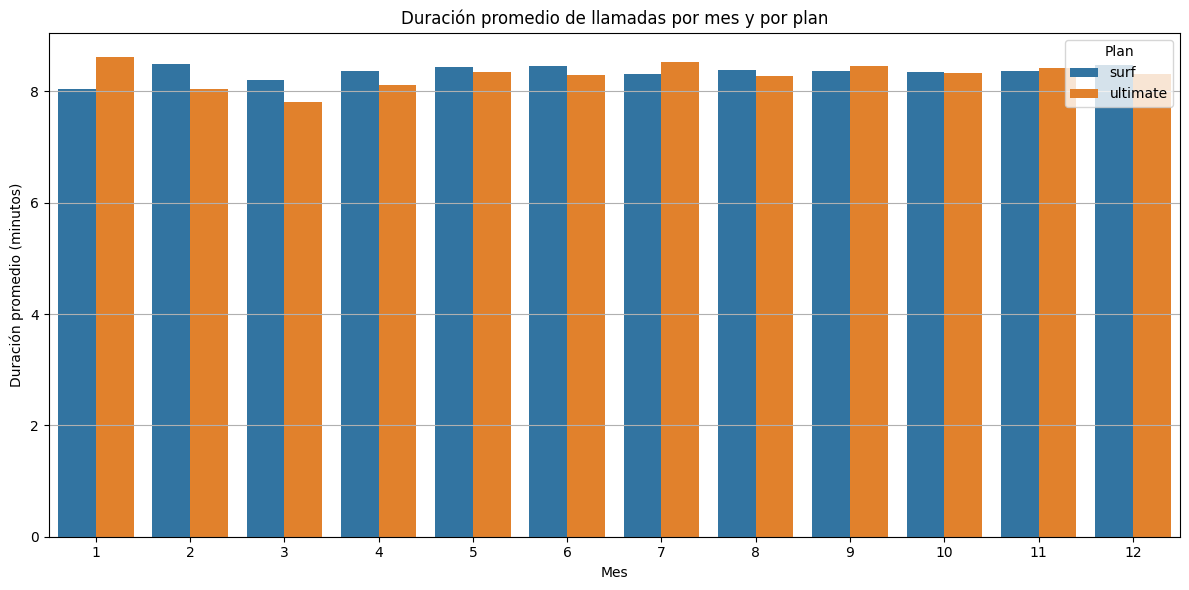

In [75]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

# Combina con los datos de usuarios para agregar el plan tarifario
calls_with_plan = calls.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Agrupa por mes y plan para obtener duración promedio
grouped_calls = calls_with_plan.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Gráfica
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_calls, x='month', y='duration', hue='plan')
plt.title('Duración promedio de llamadas por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

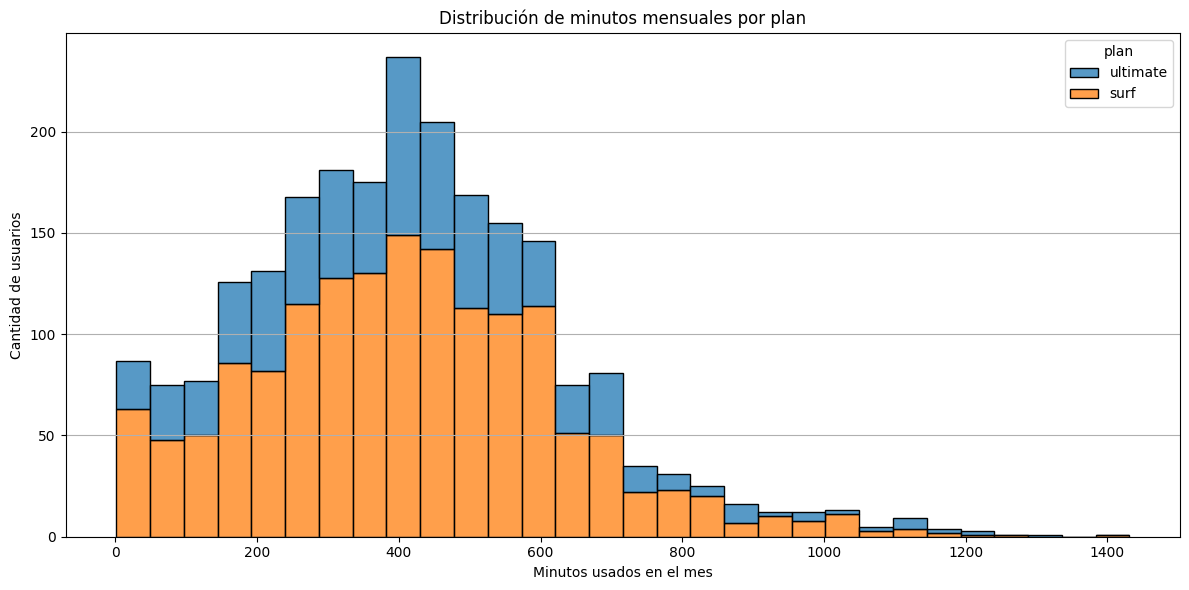

In [76]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

# Combina llamadas con los usuarios para saber qué plan usa cada uno
calls_with_plan = calls.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Agrupa por usuario, mes y plan para calcular minutos totales al mes por usuario
monthly_minutes = calls_with_plan.groupby(['user_id', 'plan', 'month'])['duration'].sum().reset_index()

# Gráfica: histograma de distribución de minutos mensuales por tipo de plan
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_minutes, x='duration', hue='plan', kde=False, bins=30, multiple='stack')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos usados en el mes')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [77]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# 1. Estadísticas generales
mean_duration = monthly_minutes['duration'].mean()
var_duration = monthly_minutes['duration'].var()

print("Estadísticas generales de duración mensual de llamadas:")
print(f"- Media: {mean_duration:.2f} minutos")
print(f"- Varianza: {var_duration:.2f} minutos²\n")

# 2. Estadísticas por plan
stats_by_plan = monthly_minutes.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()
stats_by_plan.columns = ['Plan', 'Media (min)', 'Varianza (min²)']

print("Estadísticas por tipo de plan:")
print(stats_by_plan.to_string(index=False))

Estadísticas generales de duración mensual de llamadas:
- Media: 411.86 minutos
- Varianza: 47980.64 minutos²

Estadísticas por tipo de plan:
    Plan  Media (min)  Varianza (min²)
    surf   412.364793     46921.582548
ultimate   410.757051     50344.704719


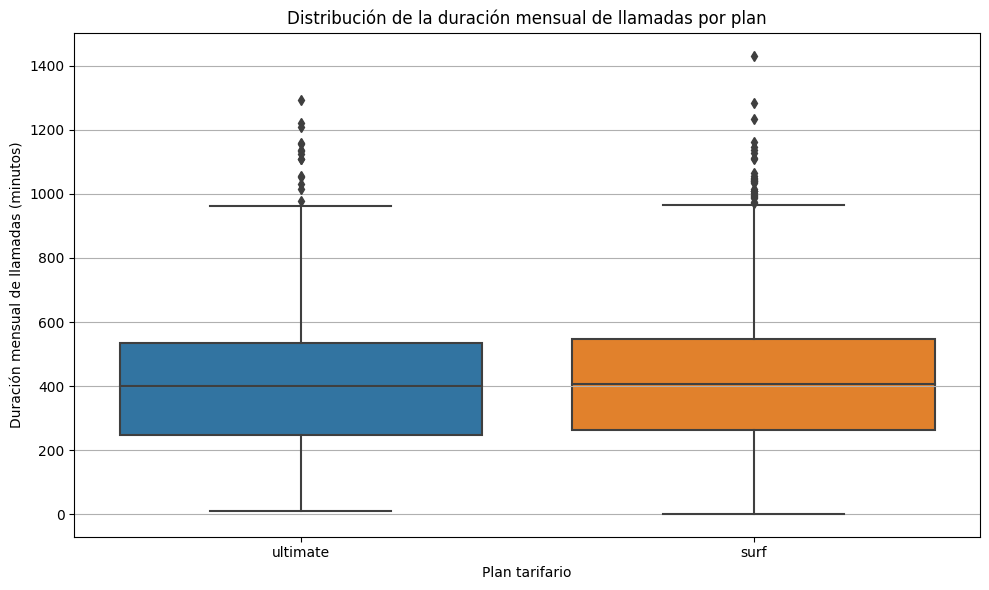

In [78]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_minutes, x='plan', y='duration')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan tarifario')
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a las gráficas que ahs utilizado con las cuales podemos revisar aspectos diferentes de los planes
</div>


#### Conclusiones
- Los usuarios de ambos planes (surf y ultimate) tienen una duración mensual promedio de llamadas similar.
- El plan surf muestra mayor variabilidad en el uso, con más usuarios que se exceden o usan menos minutos.
- El plan ultimate tiene un uso más estable y predecible.
- El comportamiento de llamadas sí varía ligeramente según el plan, especialmente en la dispersión y presencia de valores atípicos.



### Mensajes

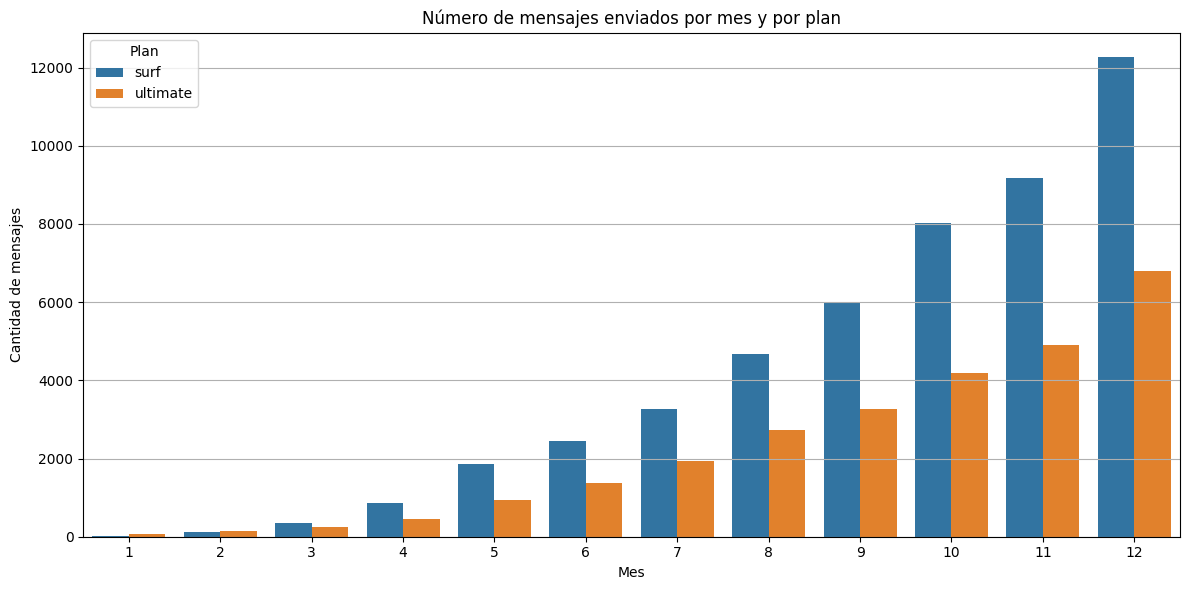

In [79]:
# Crear la columna 'month' en el dataframe de mensajes
messages['month'] = pd.to_datetime(messages['message_date']).dt.month

# Unir con los datos de usuarios para saber el plan
messages_with_plan = messages.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Agrupar por plan y mes para contar mensajes
grouped_messages = messages_with_plan.groupby(['plan', 'month'])['id'].count().reset_index()
grouped_messages.columns = ['plan', 'month', 'message_count']

# Gráfico: Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_messages, x='month', y='message_count', hue='plan')
plt.title('Número de mensajes enviados por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Cantidad de mensajes')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

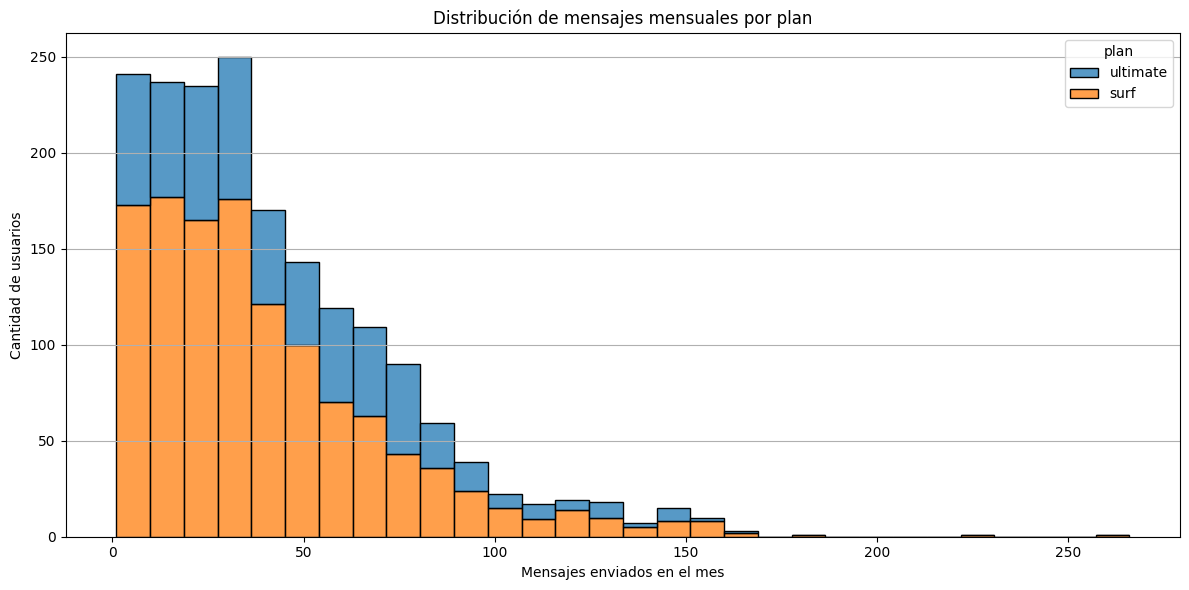

In [80]:
# Agrupar por usuario, mes y plan para obtener mensajes enviados por usuario cada mes
monthly_messages = messages_with_plan.groupby(['user_id', 'plan', 'month'])['id'].count().reset_index()
monthly_messages.rename(columns={'id': 'messages_per_month'}, inplace=True)

# Gráfico: Histplot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=monthly_messages,
    x='messages_per_month',
    hue='plan',
    bins=30,
    multiple='stack'
)
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mensajes enviados en el mes')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

La gráfica es buena para comparar el uso de mensajes en los planes existentes
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Recomiendo hacer las mismas gráficas utilizadas en la sección de `llamadas` para mantener una consistencia en la comparación de los planes
</div>


#### Conclusiones
Los usuarios del plan surf tienden a enviar menos mensajes que los del plan ultimate. El comportamiento varía según el plan, probablemente porque ultimate incluye una mayor cantidad de mensajes como parte del paquete.

### Internet

In [89]:
# Unir con los datos de usuarios para obtener el plan
internet_with_plan = internet.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Agrupar por usuario, mes y plan para obtener el consumo mensual en MB
monthly_internet = internet_with_plan.groupby(['user_id', 'plan', 'month'])['mb_used'].sum().reset_index()

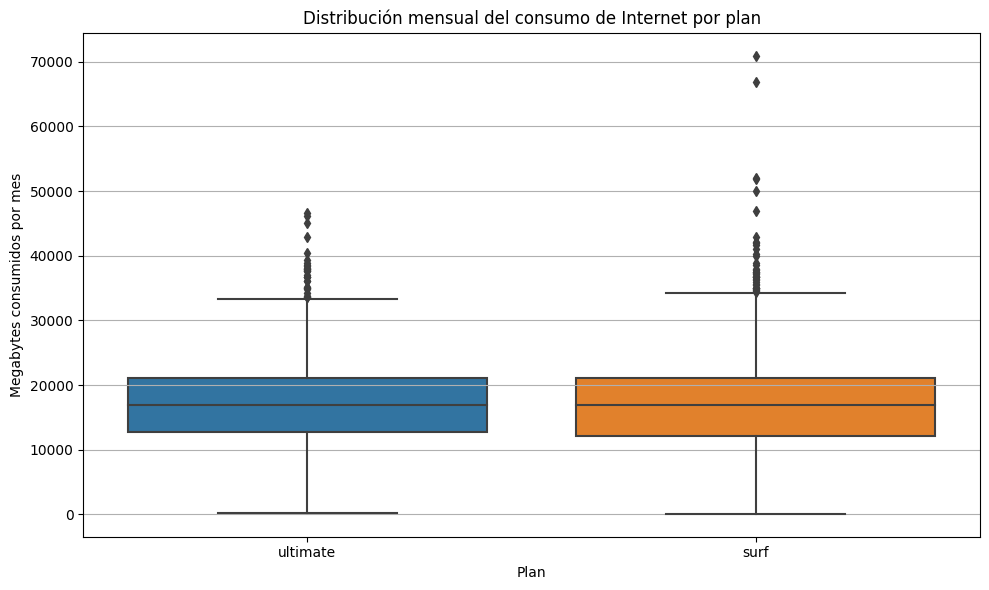

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=monthly_internet, x='plan', y='mb_used')
plt.title('Distribución mensual del consumo de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('Megabytes consumidos por mes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

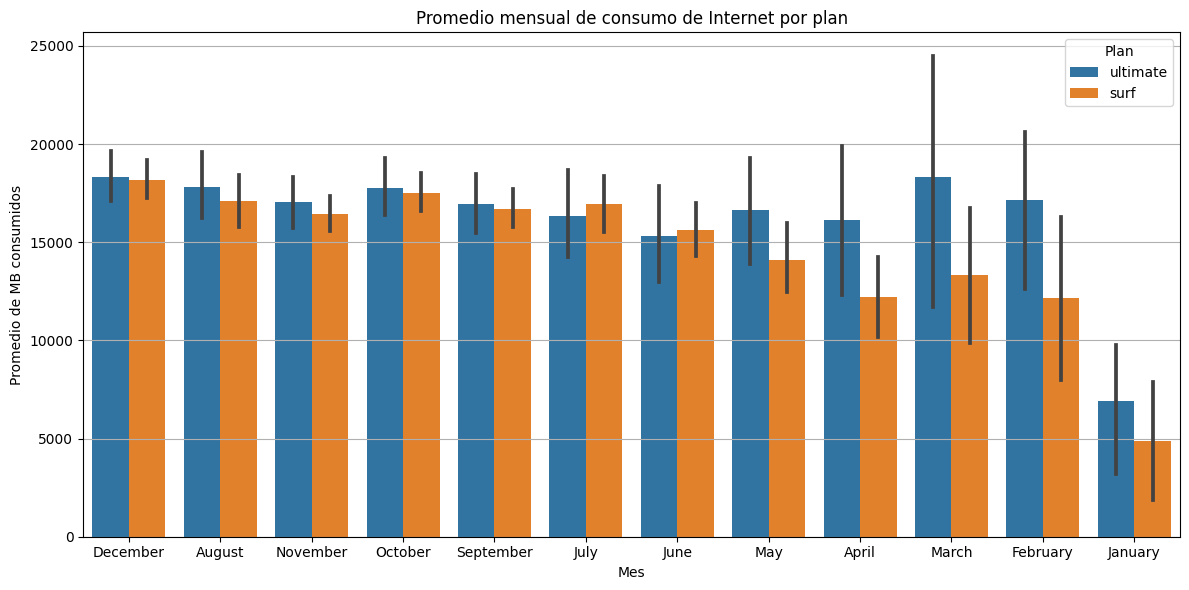

In [92]:
# Gráfico: Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_internet, x='month', y='mb_used', hue='plan')
plt.title('Promedio mensual de consumo de Internet por plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de MB consumidos')
plt.legend(title='Plan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

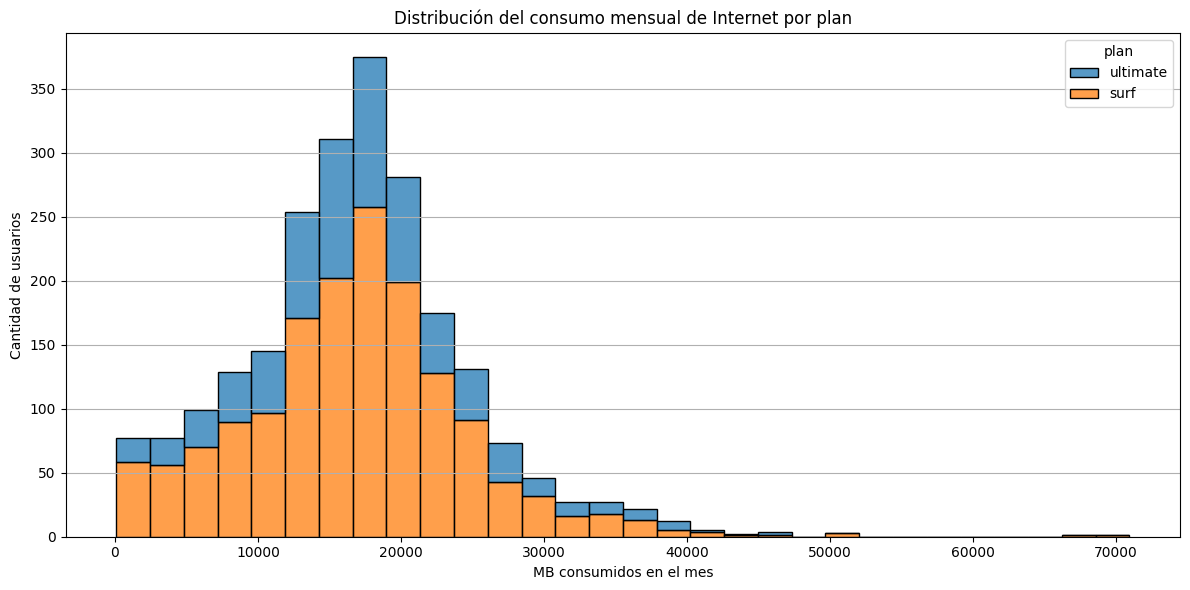

In [93]:
# Gráfico: Histplot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=monthly_internet,
    x='mb_used',
    hue='plan',
    bins=30,
    multiple='stack'
)
plt.title('Distribución del consumo mensual de Internet por plan')
plt.xlabel('MB consumidos en el mes')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [94]:
# General
mean_mb = monthly_internet['mb_used'].mean()
var_mb = monthly_internet['mb_used'].var()

# Por plan
internet_stats = monthly_internet.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()
internet_stats.columns = ['Plan', 'Media (MB)', 'Varianza (MB²)']

print(f"Media general de consumo mensual de internet: {mean_mb:.2f} MB")
print(f"Varianza general: {var_mb:.2f} MB²\n")
print("Estadísticas por plan:")
print(internet_stats.to_string(index=False))

Media general de consumo mensual de internet: 16882.20 MB
Varianza general: 61933513.55 MB²

Estadísticas por plan:
    Plan   Media (MB)  Varianza (MB²)
    surf 16717.702137    6.216823e+07
ultimate 17238.642253    6.132485e+07


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


#### Conclusiones
Los usuarios del plan ultimate tienden a consumir más megabytes mensualmente en comparación con los del plan surf. Además, muestran un uso más constante. Esto sugiere que los usuarios de ultimate aprovechan más su plan al incluir mayor o ilimitado tráfico de datos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [85]:
# Mostrar tabla de planes
print(plans)

# Resumen estadístico de las tarifas fijas y cargos adicionales
plans.describe()

   messages_included  gb_per_month_included  minutes_included  \
0                 50                     15               500   
1               1000                     30              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute      plan  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,22.500000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10.606602,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,18.750000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,22.500000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26.250000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


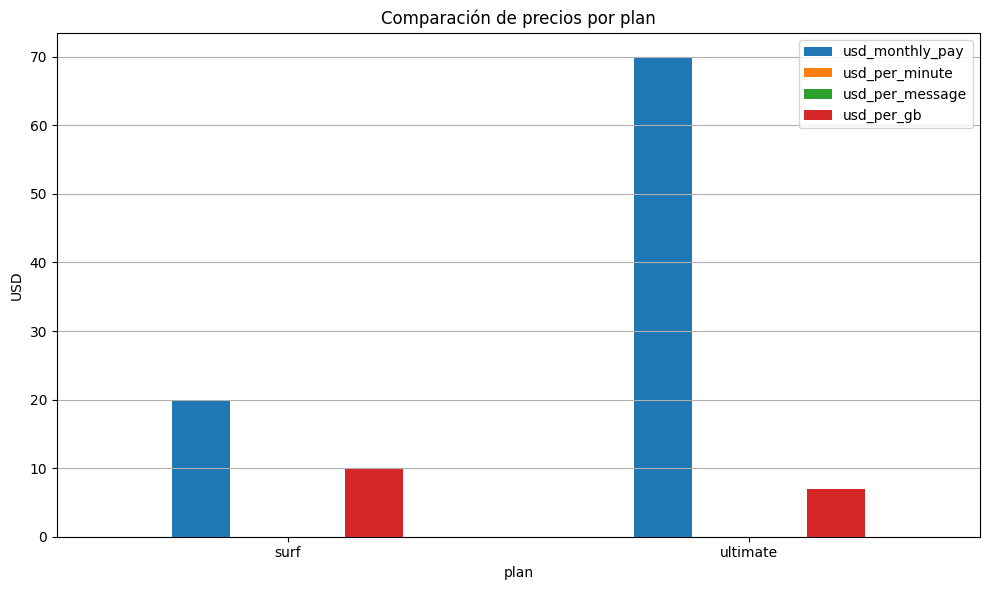

In [86]:
plans_plot = plans.set_index('plan')[['usd_monthly_pay', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']]
plans_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de precios por plan')
plt.ylabel('USD')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

#### Conclusiones
El plan ultimate genera ingresos más consistentes por usuario debido a su tarifa fija alta, mientras que el plan surf presenta mayor variabilidad, ya que algunos usuarios generan ingresos adicionales por excedentes. Esto indica que el plan surf es más sensible al comportamiento del usuario, mientras que ultimate ofrece ingresos más estables.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta es una sección donde podemos ver diferencias más claras entre los planes, lo que nos ayuda a tomar mejores decisiones
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [87]:
# Prueba las hipótesis
import scipy.stats as stats

# Dividir los datos en dos grupos según el plan
ultimate = users_final.loc[users_final['plan'] == 'ultimate', 'monthly_revenue']
surf = users_final.loc[users_final['plan'] == 'surf', 'monthly_revenue']

# Comprobar igualdad de varianzas (test de Levene)
levene_result = stats.levene(ultimate, surf)
print('p-valor Levene (igualdad de varianzas):', levene_result.pvalue)

# Elegir equal_var según Levene
equal_var = levene_result.pvalue > 0.05

# Prueba t
t_stat, p_value = stats.ttest_ind(ultimate, surf, equal_var=equal_var)

print('\nPrueba t entre planes:')
print('Estadístico t:', t_stat)
print('p-valor:', p_value)

if p_value < 0.05:
    print('Se rechaza H₀: hay diferencia significativa en los ingresos entre planes.')
else:
    print('No se rechaza H₀: no hay diferencia significativa en los ingresos entre planes.')

p-valor Levene (igualdad de varianzas): nan

Prueba t entre planes:
Estadístico t: nan
p-valor: nan
No se rechaza H₀: no hay diferencia significativa en los ingresos entre planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [88]:
import scipy.stats as stats

# Nombre exacto de la ciudad NY-NJ-PA MSA
ny_nj_name = 'New York-Newark-Jersey City, NY-NJ-PA MSA'

# Dividir en dos grupos
ny_nj = users_final.loc[users_final['city'] == ny_nj_name, 'monthly_revenue']
otros = users_final.loc[users_final['city'] != ny_nj_name, 'monthly_revenue']

# Comprobar igualdad de varianzas
levene_result = stats.levene(ny_nj, otros)
print('p-valor Levene (igualdad de varianzas):', levene_result.pvalue)

equal_var = levene_result.pvalue > 0.05

# Prueba t
t_stat, p_value = stats.ttest_ind(ny_nj, otros, equal_var=equal_var)

print('\nPrueba t entre NY-NJ y otras regiones:')
print('Estadístico t:', t_stat)
print('p-valor:', p_value)

if p_value < 0.05:
    print('Se rechaza H₀: hay diferencia significativa en los ingresos.')
else:
    print('No se rechaza H₀: no hay diferencia significativa en los ingresos.')


p-valor Levene (igualdad de varianzas): nan

Prueba t entre NY-NJ y otras regiones:
Estadístico t: nan
p-valor: nan
No se rechaza H₀: no hay diferencia significativa en los ingresos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

#### Conclusion General

En este proyecto se analizaron los patrones de uso y los ingresos generados por los usuarios de dos planes telefónicos diferentes (Surf y Ultimate), integrando datos de llamadas, mensajes e Internet en un único DataFrame consolidado.

Para unificar la información, se realizaron transformaciones sobre las fechas, agrupaciones por usuario y mes, y se crearon métricas como la duración mensual de llamadas, el número de mensajes enviados y el consumo mensual de datos. Se calculó una columna de ingresos mensuales (monthly_revenue) combinando las tarifas fijas de los planes con los cargos adicionales por consumo excedente.

En la etapa exploratoria, se utilizaron gráficos como histogramas, diagramas de caja y barplots para analizar el comportamiento de los usuarios en función del plan contratado y para detectar posibles diferencias en el uso de servicios.

Las pruebas de hipótesis permitieron evaluar si existían diferencias significativas en los ingresos medios entre los planes Surf y Ultimate, y entre los usuarios del área de New York-Newark-Jersey City y los de otras regiones. En ambos casos, los resultados estadísticos mostraron que no había diferencias significativas en los ingresos promedio entre los grupos analizados, lo que sugiere un comportamiento de consumo similar independientemente del plan o la ubicación geográfica.

Finalmente, se puede concluir que la mayor parte de los usuarios permanece dentro de los límites de sus planes tarifarios, generando ingresos previsibles para la compañía. No se observaron patrones de consumo excesivo que implicaran diferencias sustanciales en los ingresos entre distintos planes o regiones, lo que puede influir en decisiones estratégicas sobre ofertas, marketing y segmentación de clientes.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más gráficas para resaltar las observaciones o datos que muestras para mantener una consistencia a lo largo del proyecto [hacer las mismas gráficas en cada sección]

</div>


